In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [30]:
same=dict()
same_data1 =  np.random.normal(0, 0.3, size=500 )
same['data1'] = same_data1
same_data2 =  np.random.normal(0, 0.30005, size=500)
same['data2'] = same_data2

same_df = pd.DataFrame.from_dict(same)

diff=dict()
diff_data1 = np.random.normal(0, 0.3, size=500)
diff['data1'] = diff_data1
diff_data2 = np.random.normal(2.6, 0.7, size=500)
diff['data2'] = diff_data2

diff_df = pd.DataFrame.from_dict(diff)

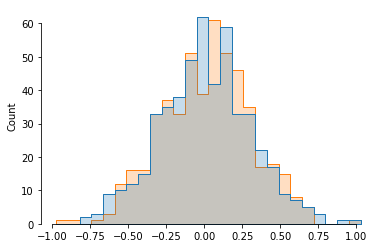

In [21]:
same_hist = sns.histplot(data=same, element="step", legend=False)
sns.despine(trim=True)
fig = same_hist.get_figure()
fig.savefig("sns-same-data.png")

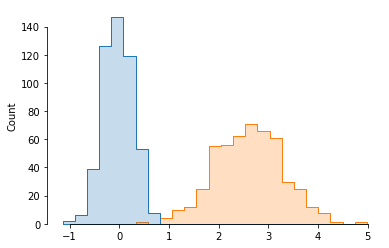

In [31]:
diff_hist = sns.histplot(data=diff, element="step", legend=False, bins=25)
sns.despine(trim=True)
fig = diff_hist.get_figure()
fig.savefig("sns-diff-data.png")

In [36]:
active_delta_scores = dict()
labels = ['AtRGL2 vs all', 'PvCesA2 vs all', 'AtRGL2 vs neg', 'PiAVR3a vs all',  'PiEPIC2B vs all', 'PvCesA2 vs neg', 'PiAVR3a vs neg', 'PiEPIC2B vs neg']
active_inactive = [0.07, 0.19, 0.20, 0.28, 0.29, 0.49, 0.66, 0.69]
a_delta_f1 = [0.26, 0.18, 0.16, 0.12, 0.14, 0.04, 0.03, 0.01]
a_delta_prec = [0.04, -0.10, -0.09, -0.14, -0.10, -0.10, -0.06, -0.05]
a_delta_rec = [0.36, 0.24, 0.25, 0.17, 0.22, 0.15, 0.08, 0.07]

active_delta_scores['targets'] = labels
active_delta_scores['active/inactive'] = active_inactive
active_delta_scores['f1'] = a_delta_f1
active_delta_scores['precision'] = a_delta_prec
active_delta_scores['recall'] = a_delta_rec

active_df = pd.DataFrame.from_dict(active_delta_scores)

In [37]:
inactive_delta_scores = dict()
i_delta_f1 = [-0.01, -0.03, -0.02, -0.06, -0.07, -0.04, -0.04, -0.04]
i_delta_prec = [0.02, 0.03, 0.03, 0.01, 0.02, 0.03, 0.01, 0.00]
i_delta_rec = [-0.04, -0.09, -0.07, -0.15, -0.17, -0.12, -0.10, -0.08]

inactive_delta_scores['targets'] = labels
inactive_delta_scores['active/inactive'] = active_inactive

inactive_delta_scores['f1'] = i_delta_f1
inactive_delta_scores['precision'] = i_delta_prec
inactive_delta_scores['recall'] = i_delta_rec

inactive_df = pd.DataFrame.from_dict(inactive_delta_scores)

In [42]:
weighted_delta_scores = dict()
w_delta_f1 = [0.00, 0.01, 0.01, -0.01, -0.03, -0.01, -0.01, -0.02]
w_delta_prec = [0.02, 0.01, 0.00, -0.01, -0.01, -0.01, -0.02, -0.03]
w_delta_rec = [-0.02, -0.04, -0.01, -0.07, -0.08, -0.03, -0.02, 0.01]

weighted_delta_scores['targets'] = labels
weighted_delta_scores['active/inactive'] = active_inactive

weighted_delta_scores['f1'] = w_delta_f1
weighted_delta_scores['precision'] = w_delta_prec
weighted_delta_scores['recall'] = w_delta_rec

weighted_df = pd.DataFrame.from_dict(weighted_delta_scores)

weighted_df.head()

,targets,active/inactive,f1,precision,recall
0,AtRGL2 vs all,0.07,0.00,0.02,-0.02
1,PvCesA2 vs all,0.19,0.01,0.01,-0.04
2,AtRGL2 vs neg,0.20,0.01,0.00,-0.01
3,PiAVR3a vs all,0.28,-0.01,-0.01,-0.07
4,PiEPIC2B vs all,0.29,-0.03,-0.01,-0.08


In [43]:
active_dfm = active_df.melt(id_vars= ['active/inactive', 'targets'], var_name='Score', value_name='Change')
inactive_dfm = inactive_df.melt(id_vars=['active/inactive', 'targets'], var_name='Score', value_name='Change')
weighted_dfm = weighted_df.melt(id_vars=['active/inactive', 'targets'], var_name='Score', value_name='Change')

weighted_dfm

,active/inactive,targets,Score,Change
0,0.07,AtRGL2 vs all,f1,0.00
1,0.19,PvCesA2 vs all,f1,0.01
2,0.20,AtRGL2 vs neg,f1,0.01
3,0.28,PiAVR3a vs all,f1,-0.01
4,0.29,PiEPIC2B vs all,f1,-0.03
5,0.49,PvCesA2 vs neg,f1,-0.01
6,0.66,PiAVR3a vs neg,f1,-0.01
7,0.69,PiEPIC2B vs neg,f1,-0.02
8,0.07,AtRGL2 vs all,precision,0.02
9,0.19,PvCesA2 vs all,precision,0.01


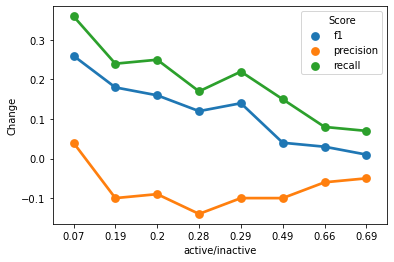

In [34]:
# boost low-instance learning
g_active = sns.pointplot(x="active/inactive", y='Change', hue='Score', data=active_dfm)

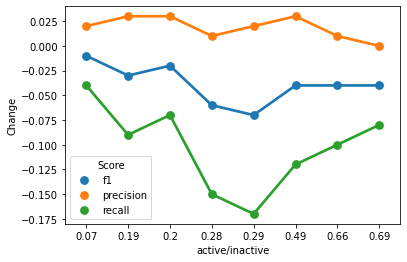

In [35]:
g_inactive = sns.pointplot(x="active/inactive", y='Change', hue='Score', data=inactive_dfm)

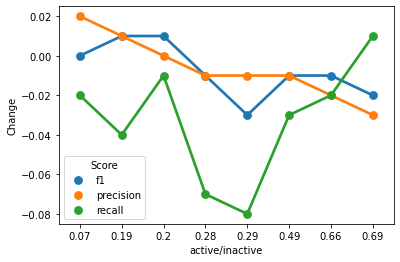

In [44]:
g_weighted = sns.pointplot(x="active/inactive", y='Change', hue='Score', data=weighted_dfm)

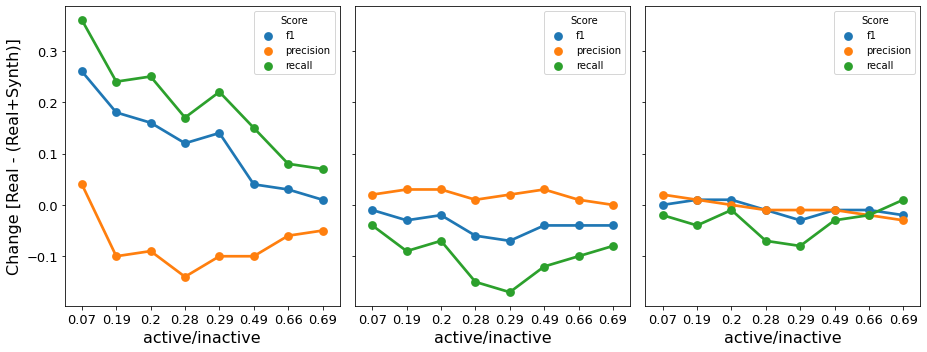

In [59]:
fig, (ax_a, ax_i, ax_w) = plt.subplots(1, 3, figsize=(13,5), sharey=True)
sns.pointplot(x="active/inactive", y='Change', hue='Score', data=active_dfm, ax=ax_a)
ax_a.set_ylabel('Change [Real - (Real+Synth)]', fontsize=16)
ax_a.set_xlabel('active/inactive',fontsize=16)
ax_a.tick_params(axis='both', labelsize=13)
sns.pointplot(x="active/inactive", y='Change', hue='Score', data=inactive_dfm, ax=ax_i)
ax_i.set_ylabel("")
ax_i.set_xlabel('active/inactive',fontsize=16)
ax_i.tick_params(axis='both', labelsize=13)
sns.pointplot(x="active/inactive", y='Change', hue='Score', data=weighted_dfm, ax=ax_w)
ax_w.set_ylabel("")
ax_w.set_xlabel('active/inactive',fontsize=16)
ax_w.tick_params(axis='both', labelsize=13)
plt.tight_layout()
fig.savefig("change_in_score.png")
plt.show()